# Machine Learning Mini Project

## Poker Hand Prediction

## Data Description:

## Input:

#### S1, S2, S3, S4, S5: " Suit of card #n " :
#### Values (1-4) representing {Hearts, Spades, Diamonds, Clubs}

#### C1, C2, C3, C4, C5: " Rank of card #n " 
#### Values (1-13) representing {Ace, 2, 3, ... , Queen, King}

#### Data in the form S1, C1, S2, C2, S3, C3, S4, C4, S5, C5

## Output:

#### Class “Poker Hand”
#### Ordinal (0-9)

#### 0: Nothing in hand; not a recognized poker hand 
#### 1: One pair; one pair of equal ranks within five cards
#### 2: Two pairs; two pairs of equal ranks within five cards
#### 3: Three of a kind; three equal ranks within five cards
#### 4: Straight; five cards, sequentially ranked with no gaps
#### 5: Flush; five cards with the same suit
#### 6: Full house; pair + different rank three of a kind
#### 7: Four of a kind; four equal ranks within five cards
#### 8: Straight flush; straight + flush
#### 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [2]:
"""Import necessary libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
import seaborn as sn

In [50]:
def gen_bar_graph(values,no_of_x,xticks,title):
    """Generates a simple bar graph.
    Input:
    values: list of values for each bar
    no_of_x: int for the no of values
    title: Title of your plot"""
    fig,ax = plt.subplots()
    plt.bar(np.arange(no_of_x),values,color='xkcd:lime green')
    plt.title(title)
    ax.set_facecolor('xkcd:navy blue')
    plt.xticks(xticks)
    plt.show()
def genval(cm):
    """Generate correctly predicted values for each class from a confusion matrix"""
    trueval = []
    totval = np.sum(cm,axis = 1)
    print(totval)

    for i in range(len(cm)):
        for j in range(len(cm)):
            if(i == j):
                trueval.append(cm[i][j])
    return totval,trueval
def gen_multibar(cm2,figname):
    """Generate a bar graph from a given confusion matrix"""
    totval, trueval = genval(cm2)
    fig,ax = plt.subplots()
    plt.bar(np.arange(len(lkey)),trueval,width= 0.35,color='xkcd:red',label='Prediction Value Count')
    plt.bar(np.arange(len(lkey))+0.35,totval,width = 0.35,color='xkcd:blue',label='Actual Value Count')
    plt.title(figname)
    plt.xticks(lkey)
    plt.legend()
    plt.tight_layout()
    plt.savefig(figname+".png")
    plt.show()

In [3]:
resultdict = dict()

Dataset:
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   1  10   1  11   1  13   1  12   1   1      9
1   2  11   2  13   2  10   2  12   2   1      9
2   3  12   3  11   3  13   3  10   3   1      9
3   4  10   4  11   4   1   4  13   4  12      9
4   4   1   4  13   4  12   4  11   4  10      9
X_train Shape
(25010, 10)
Y_train Shape
(25010,)
X_test Shape
(1000000, 10)
Y_test Shape
(1000000,)


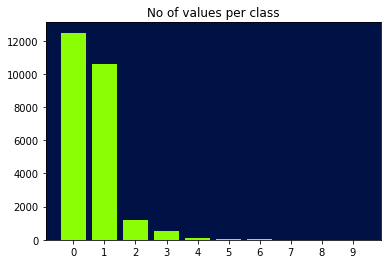

In [19]:
"""Import the dataset, preprocess, visualize"""
from collections import Counter

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

x_train = train.iloc[:,:-1].values
y_train = train.iloc[:,[-1]].values

x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,[-1]].values

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)


count = dict(Counter(y_train))
lkey = []
lval = []
for key,value in count.items():
    lkey.append(key)
    lval.append(value)
    
"""Data Preprocessing"""
# encode = OneHotEncoder(categorical_features = [0])
# y_train = encode.fit_transform(y_train).toarray()
# y_test = encode.transform(y_test).toarray()

# sc_X = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.transform(x_test)


print("Dataset:")
print(train.head())
print("X_train Shape")
print(x_train.shape)
print("Y_train Shape")
print(y_train.shape)
print("X_test Shape")
print(x_test.shape)
print("Y_test Shape")
print(y_test.shape)

gen_bar_graph(lval,len(lkey),lkey,"No of values per class")

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear',verbose = True)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)

acc = nb.score(x_test,y_test)
print("Accuracy: ",acc*100)

cm1 = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8,8)) 
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm1, annot=True,annot_kws={"size": 10},linewidths = .5,ax=ax,fmt='g')

resultdict['SVM Accuracy'] = acc

[LibSVM]

## Naive Bayes

Accuracy:  50.129400000000004
[501209 422498  47622  21121   3885   1996   1424    230     12      3]


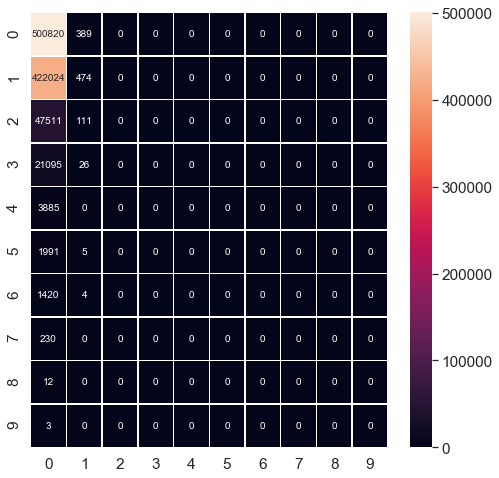

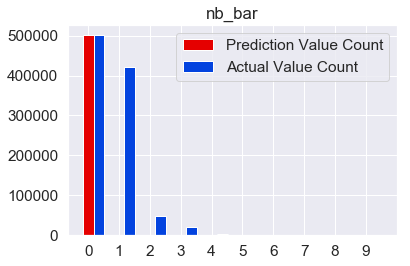

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)


acc = nb.score(x_test,y_test)
print("Accuracy: ",acc*100)

cm2 = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8,8)) 
sn.set(font_scale=1.4)#for label size
hm = sn.heatmap(cm2, annot=True,annot_kws={"size": 10},linewidths = .5,ax=ax,fmt='g')
figure = hm.get_figure()
figure.savefig("nb_heatmap.png")

resultdict['Naive Bayes Accuracy'] = acc

gen_multibar(cm2,"nb_bar")          

## Random Forest Classifier

Accuracy:  56.7909
[501209 422498  47622  21121   3885   1996   1424    230     12      3]


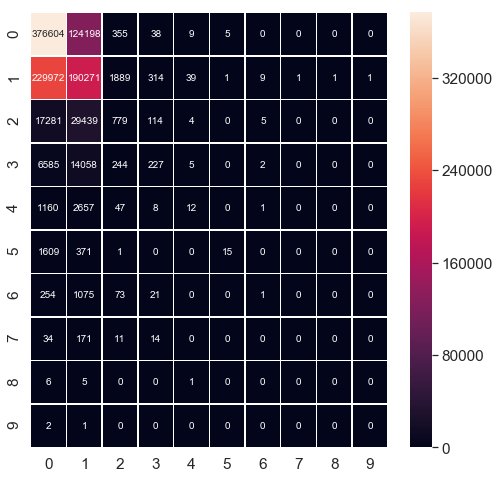

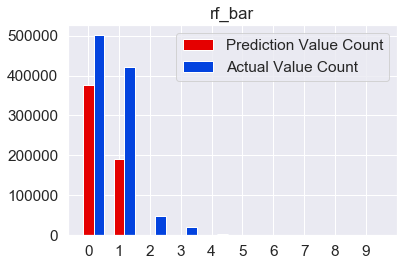

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

acc = rfc.score(x_test,y_test)
print("Accuracy: ",acc*100)

y_pred = rfc.predict(x_test)

cm3 = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8,8)) 
sn.set(font_scale=1.4)#for label size
hm = sn.heatmap(cm3, annot=True,annot_kws={"size": 10},linewidths = .5,ax=ax,fmt='g')
figure = hm.get_figure()
figure.savefig("rf_heatmap.png")

resultdict['Random Forest Accuracy'] = acc

gen_multibar(cm3,"rf_bar")

## Decision Tree

Accuracy:  47.9978
[501209 422498  47622  21121   3885   1996   1424    230     12      3]


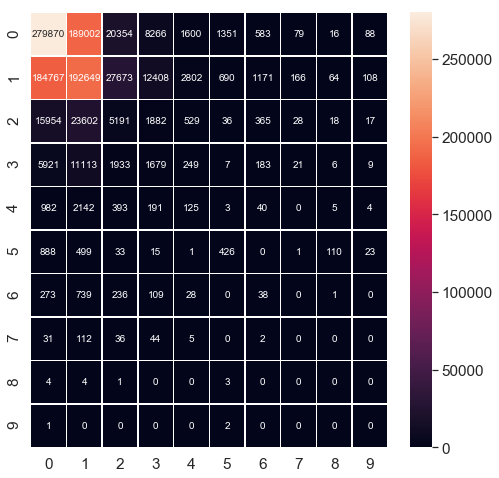

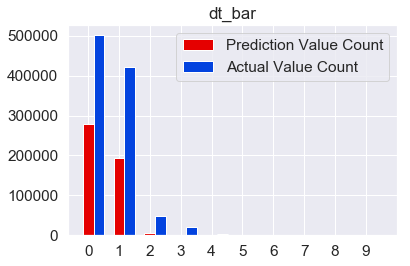

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

acc = dtc.score(x_test,y_test)
print("Accuracy: ",acc*100)

cm4 = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(8,8)) 
sn.set(font_scale=1.4)#for label size
hm = sn.heatmap(cm4, annot=True,annot_kws={"size": 10},linewidths = .5,ax=ax,fmt='g')
figure = hm.get_figure()
figure.savefig("dt_heatmap.png")

resultdict['Decision Tree Accuracy'] = acc

gen_multibar(cm4,"dt_bar")

## AdaBoost Classifier

Accuracy:  49.1576
[501209 422498  47622  21121   3885   1996   1424    230     12      3]


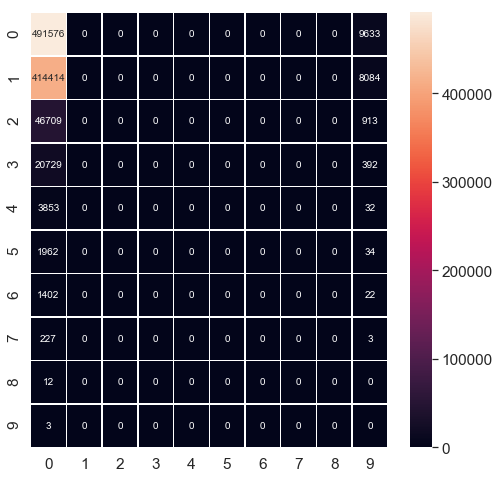

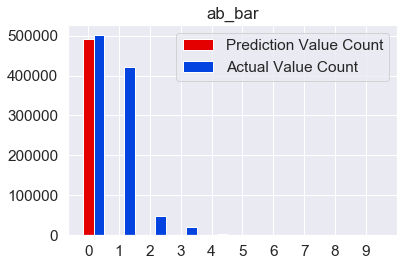

In [54]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(x_train,y_train)
y_pred = adc.predict(x_test)
acc = adc.score(x_test,y_test)

print("Accuracy: ",acc*100)

cm5 = confusion_matrix(y_test,y_pred)


fig, ax = plt.subplots(figsize=(8,8)) 
sn.set(font_scale=1.4)#for label size
hm = sn.heatmap(cm5, annot=True,annot_kws={"size": 10},linewidths = .5,ax=ax,fmt='g')
figure = hm.get_figure()
figure.savefig("ab_heatmap.png")

resultdict['AdaBoost Accuracy'] = acc
gen_multibar(cm5,"ab_bar")

## Deep Learning(Artificial Neural Network)

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense

x_train = train.iloc[:,:-1].values
y_train = train.iloc[:,[-1]].values

x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,[-1]].values

"""Data Preprocessing"""
encode = OneHotEncoder(categorical_features = [0])
y_train = encode.fit_transform(y_train).toarray()
y_test = encode.transform(y_test).toarray()

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

model = Sequential()
model.add(Dense(32,activation = 'relu',input_dim = 10))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()
# model.fit(x_train,y_train,batch_size = 10, epochs = 50)

c:\users\somil\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 4,874
Trainable params: 4,874
Non-trainable params: 0
_________________________________________________________________


In [59]:
# model.save_weights('ann.h5')
model.load_weights('ann.h5')
score = model.evaluate(x_test,y_test)

1000000/1000000 [==============================] - 72s 72us/step


In [60]:
resultdict['ANN Accuracy'] = score[1]
print("ANN Accuracy ",score[1]*100)

ANN Accuracy  94.4969


In [67]:
keys = []
vals = []
for key,value in resultdict.items():
    keys.append(key)
    vals.append(round(value*100,2))
df = pd.DataFrame({"Model Name":keys,"Accuracy":vals})
df = df.sort_values("Accuracy")
print(df)

   Accuracy              Model Name
0     48.00  Decision Tree Accuracy
1     49.16       AdaBoost Accuracy
4     50.13    Naive Bayes Accuracy
3     56.79  Random Forest Accuracy
2     94.50            ANN Accuracy


## Conclusion:
### ANNs give the best results with an overall accuracy of 94.4%